In [563]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [564]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')
rawHisTransDF.dropna(subset=['item_description','invoice_id'], inplace=True)
rawHisTransDF=rawHisTransDF.drop_duplicates()
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date
rawHisTransDF.dropna(subset=['item_description','invoice_id'], inplace=True)
rawHisTransDF=rawHisTransDF.drop_duplicates()

In [565]:
rawHisTransDF

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14,8014206.0,ZEBZ,SHOP003,60,2
473821,BOTTLED DRINKING WATER 500ML,2021-10-16,8304754.0,AFR6,SHOP127,35,2
473822,GINGER BEER 1.5L,2021-10-16,8304807.0,J2A6,SHOP127,220,1
473823,BOTTLED DRINKING WATER 500ML,2021-11-07,8313570.0,1S0U,SHOP127,35,1


In [566]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rawHisTransDF['item_description'] = le.fit_transform(rawHisTransDF['item_description'])
rawHisTransDF['customer_id'] = le.fit_transform(rawHisTransDF['customer_id'])
rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].replace({'High': 3, 'Moderate': 2, 'Low': 1})
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].fillna(0.0).astype(int)
rawHisTransDF['invoice_id'] = rawHisTransDF['invoice_id'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8244\3367044723.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8244\3367044723.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [567]:
rawHisTransDF

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,27,2021-12-11,147,57272,8,220,2
1,14,2021-10-17,371,91334,112,220,2
2,35,2021-12-13,484,158179,8,160,2
3,4,2021-12-13,484,158179,8,150,2
4,34,2021-10-23,1310,38862,112,210,5
...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2
473821,1,2021-10-16,8304754,52159,127,35,2
473822,14,2021-10-16,8304807,95280,127,220,1
473823,1,2021-11-07,8313570,8748,127,35,1


In [568]:
rawHisTransDF['payment']=rawHisTransDF['item_price']*rawHisTransDF['quantity_sold']

In [569]:
# group the dataframe by the 'group' column and get the size of each group
transactions_by_shop = rawHisTransDF.groupby('shop_id').size().reset_index()

# rename columns of the new dataframe
transactions_by_shop.columns = ['shop_id', 'num_of_transactions']

In [607]:
# Calculate average price for each item type sold by each shop
avg_prices = rawHisTransDF.groupby(['shop_id', 'item_description'])['item_price'].mean().reset_index()

# Rename 'price' column to 'avg_price'
avg_prices.columns = ['shop_id', 'item_description','times']

# Merge the average prices back into the original DataFrame
# merged_df = pd.merge(merged_df, avg_prices, on=['shop_id', 'item_description'])

In [605]:
avg_prices

,shop_id,item_description,avg_price
0,1,0,117.500000
1,1,1,92.421875
2,1,3,290.309278
3,1,4,150.000000
4,1,5,114.583333
...,...,...,...
4293,127,32,170.860215
4294,127,33,278.750000
4295,127,34,128.333333
4296,127,35,571.460674


In [571]:
rawHisTransDF

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,payment
0,27,2021-12-11,147,57272,8,220,2,440
1,14,2021-10-17,371,91334,112,220,2,440
2,35,2021-12-13,484,158179,8,160,2,320
3,4,2021-12-13,484,158179,8,150,2,300
4,34,2021-10-23,1310,38862,112,210,5,1050
...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,120
473821,1,2021-10-16,8304754,52159,127,35,2,70
473822,14,2021-10-16,8304807,95280,127,220,1,220
473823,1,2021-11-07,8313570,8748,127,35,1,35


In [572]:
result = rawHisTransDF.groupby(['shop_id'])['payment'].sum()

In [573]:
# merging two dataframes on 'key' column
merged_df = pd.merge(rawStoreInfDF, result, on='shop_id')
merged_df = pd.merge(transactions_by_shop,result,on='shop_id')
merged_df

,shop_id,num_of_transactions,payment
0,1,1719,1002935
1,2,4115,2645315
2,3,3199,1667950
3,4,3000,1420415
4,5,3421,1610210
...,...,...,...
119,123,1714,825390
120,124,3743,2548215
121,125,1449,966570
122,126,2759,1623175


In [574]:
rawHisTransDF

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,payment
0,27,2021-12-11,147,57272,8,220,2,440
1,14,2021-10-17,371,91334,112,220,2,440
2,35,2021-12-13,484,158179,8,160,2,320
3,4,2021-12-13,484,158179,8,150,2,300
4,34,2021-10-23,1310,38862,112,210,5,1050
...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,120
473821,1,2021-10-16,8304754,52159,127,35,2,70
473822,14,2021-10-16,8304807,95280,127,220,1,220
473823,1,2021-11-07,8313570,8748,127,35,1,35


In [575]:
# group by 'group' column and find number of unique values in 'value' column for each group
result = rawHisTransDF.groupby('shop_id')['customer_id'].apply(lambda x: len(set(x))).reset_index()
result

,shop_id,customer_id
0,1,1026
1,2,2412
2,3,1959
3,4,1644
4,5,1985
...,...,...
119,123,1044
120,124,2134
121,125,785
122,126,1619


In [576]:
unique_values = rawHisTransDF['item_description'].unique()
print(unique_values)

[27 14 35  4 34  3 36 11 33 10 19 22 12 24 20 15  9  8  5 13  6  1 32 17
 31 26 30  0 25 18 28  7 21 29 16  2 23]


In [577]:
# group the dataframe by the 'group' column and get the size of each group
temp = rawHisTransDF.groupby(['shop_id','item_description']).size().reset_index()

# rename columns of the new dataframe
temp.columns = ['shop_id', 'item_description','times']

In [ ]:
# # Calculate average price for each item type sold by each shop
# avg_prices = rawHisTransDF.groupby(['shop_id', 'item_description'])['item_price'].mean().reset_index()

# # Rename 'price' column to 'avg_price'
# avg_prices.columns = ['shop_id', 'item_description','times']

# # Merge the average prices back into the original DataFrame
# # merged_df = pd.merge(merged_df, avg_prices, on=['shop_id', 'item_description'])

In [578]:
temp.to_csv('final1.csv')

In [579]:
# pivot the dataframe to make item_description values as columns
pivoted_df = temp.pivot(index='shop_id', columns='item_description', values='times')

# fill NaN values with 0
pivoted_df.fillna(0, inplace=True)

# resetting the index
pivoted_df = pivoted_df.reset_index()

In [580]:
pivoted_df

item_description,shop_id,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
0,1,28.0,64.0,0.0,194.0,16.0,48.0,55.0,11.0,24.0,...,117.0,32.0,10.0,16.0,58.0,71.0,38.0,15.0,54.0,13.0
1,2,66.0,121.0,0.0,503.0,41.0,236.0,92.0,46.0,40.0,...,211.0,104.0,13.0,45.0,129.0,190.0,207.0,24.0,150.0,28.0
2,3,73.0,164.0,0.0,325.0,48.0,156.0,129.0,23.0,62.0,...,163.0,66.0,7.0,28.0,107.0,140.0,121.0,36.0,134.0,21.0
3,4,44.0,79.0,0.0,279.0,33.0,105.0,55.0,24.0,30.0,...,164.0,62.0,11.0,34.0,127.0,155.0,103.0,38.0,81.0,33.0
4,5,62.0,96.0,0.0,337.0,33.0,143.0,97.0,35.0,64.0,...,143.0,76.0,8.0,35.0,126.0,112.0,122.0,49.0,84.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,41.0,51.0,0.0,173.0,18.0,76.0,59.0,16.0,38.0,...,87.0,37.0,8.0,19.0,63.0,60.0,52.0,42.0,42.0,22.0
120,124,87.0,172.0,0.0,254.0,34.0,132.0,72.0,74.0,92.0,...,155.0,69.0,12.0,31.0,128.0,179.0,169.0,103.0,139.0,49.0
121,125,41.0,92.0,0.0,41.0,11.0,83.0,14.0,31.0,19.0,...,31.0,9.0,14.0,25.0,91.0,124.0,95.0,3.0,93.0,13.0
122,126,74.0,50.0,0.0,189.0,0.0,142.0,72.0,97.0,50.0,...,160.0,36.0,0.0,28.0,168.0,224.0,118.0,56.0,157.0,31.0


In [613]:
# pivot the dataframe to make item_description values as columns
pivoted_df_avg = avg_prices.pivot(index='shop_id', columns='item_description', values='times')

# fill NaN values with 0
pivoted_df_avg.fillna(0, inplace=True)

# resetting the index
pivoted_df_avg = pivoted_df_avg.reset_index()
pivoted_df_avg

item_description,shop_id,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
0,1,117.500000,92.421875,0.0,290.309278,150.000000,114.583333,177.272727,230.909091,301.250000,...,265.128205,240.625000,195.000000,106.250000,123.275862,93.661972,319.210526,106.666667,319.444444,332.307692
1,2,100.757576,89.958678,0.0,363.021869,160.975610,122.881356,194.021739,225.869565,323.500000,...,286.729858,264.423077,207.692308,106.666667,173.100775,103.526316,274.154589,116.666667,268.066667,356.785714
2,3,102.602740,55.274390,0.0,329.661538,218.750000,121.794872,191.860465,200.869565,313.064516,...,268.588957,246.666667,150.000000,128.571429,173.738318,93.500000,262.809917,110.833333,241.791045,295.714286
3,4,84.318182,58.481013,0.0,316.989247,168.181818,132.380952,180.000000,240.000000,306.000000,...,284.390244,237.741935,177.272727,132.352941,129.055118,99.354839,209.611650,141.842105,271.358025,294.545455
4,5,102.741935,58.333333,0.0,259.169139,159.090909,106.993007,171.649485,235.714286,337.968750,...,243.076923,254.736842,168.750000,111.428571,130.952381,83.750000,235.327869,131.428571,338.333333,430.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,121.219512,73.431373,0.0,295.028902,150.000000,113.157895,175.423729,199.375000,321.842105,...,257.931034,291.351351,150.000000,115.789474,130.952381,108.500000,217.884615,120.000000,282.857143,294.545455
120,124,124.712644,95.029070,0.0,264.173228,167.647059,121.212121,166.666667,244.594595,338.152174,...,254.064516,258.260870,162.500000,129.032258,150.390625,129.832402,243.195266,140.679612,372.661871,297.551020
121,125,134.878049,112.228261,0.0,241.463415,150.000000,146.987952,182.142857,350.645161,353.684211,...,319.354839,220.000000,171.428571,112.000000,178.901099,155.806452,315.157895,116.666667,386.666667,332.307692
122,126,100.270270,189.000000,0.0,265.396825,0.000000,155.633803,177.083333,267.113402,306.200000,...,276.375000,281.111111,0.000000,164.285714,141.428571,101.250000,203.644068,160.000000,331.592357,270.000000


In [614]:
# rename every column except the first two columns with an incrementing value
for i, col in enumerate(pivoted_df_avg.columns[2:], start=1):
    pivoted_df_avg = pivoted_df_avg.rename(columns={col: f'Column_{i}'})

In [615]:
pivoted_df_avg

item_description,shop_id,0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,...,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_36
0,1,117.500000,92.421875,0.0,290.309278,150.000000,114.583333,177.272727,230.909091,301.250000,...,265.128205,240.625000,195.000000,106.250000,123.275862,93.661972,319.210526,106.666667,319.444444,332.307692
1,2,100.757576,89.958678,0.0,363.021869,160.975610,122.881356,194.021739,225.869565,323.500000,...,286.729858,264.423077,207.692308,106.666667,173.100775,103.526316,274.154589,116.666667,268.066667,356.785714
2,3,102.602740,55.274390,0.0,329.661538,218.750000,121.794872,191.860465,200.869565,313.064516,...,268.588957,246.666667,150.000000,128.571429,173.738318,93.500000,262.809917,110.833333,241.791045,295.714286
3,4,84.318182,58.481013,0.0,316.989247,168.181818,132.380952,180.000000,240.000000,306.000000,...,284.390244,237.741935,177.272727,132.352941,129.055118,99.354839,209.611650,141.842105,271.358025,294.545455
4,5,102.741935,58.333333,0.0,259.169139,159.090909,106.993007,171.649485,235.714286,337.968750,...,243.076923,254.736842,168.750000,111.428571,130.952381,83.750000,235.327869,131.428571,338.333333,430.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,121.219512,73.431373,0.0,295.028902,150.000000,113.157895,175.423729,199.375000,321.842105,...,257.931034,291.351351,150.000000,115.789474,130.952381,108.500000,217.884615,120.000000,282.857143,294.545455
120,124,124.712644,95.029070,0.0,264.173228,167.647059,121.212121,166.666667,244.594595,338.152174,...,254.064516,258.260870,162.500000,129.032258,150.390625,129.832402,243.195266,140.679612,372.661871,297.551020
121,125,134.878049,112.228261,0.0,241.463415,150.000000,146.987952,182.142857,350.645161,353.684211,...,319.354839,220.000000,171.428571,112.000000,178.901099,155.806452,315.157895,116.666667,386.666667,332.307692
122,126,100.270270,189.000000,0.0,265.396825,0.000000,155.633803,177.083333,267.113402,306.200000,...,276.375000,281.111111,0.000000,164.285714,141.428571,101.250000,203.644068,160.000000,331.592357,270.000000


In [581]:
pivoted_df.to_csv('final3.csv')

In [582]:
rawStoreInfDF=pd.merge(rawStoreInfDF,pivoted_df, on='shop_id')

In [583]:
rawStoreInfDF=pd.merge(rawStoreInfDF,result, on='shop_id')

In [584]:
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,0,1,2,3,4,5,6,...,28,29,30,31,32,33,34,35,36,customer_id
0,47,528,2,22.0,48.0,0.0,144.0,17.0,69.0,44.0,...,34.0,25.0,20.0,47.0,32.0,59.0,16.0,63.0,15.0,841
1,9,676,3,63.0,209.0,0.0,394.0,39.0,147.0,115.0,...,109.0,10.0,67.0,84.0,129.0,79.0,21.0,74.0,34.0,2210
2,83,676,1,44.0,98.0,0.0,338.0,38.0,121.0,109.0,...,79.0,15.0,31.0,87.0,83.0,80.0,41.0,64.0,36.0,1719
3,117,676,1,55.0,63.0,0.0,270.0,31.0,78.0,166.0,...,49.0,24.0,27.0,243.0,233.0,245.0,44.0,176.0,23.0,1898
4,42,676,1,51.0,101.0,0.0,286.0,24.0,117.0,81.0,...,48.0,11.0,30.0,89.0,124.0,88.0,44.0,53.0,31.0,1661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,87,527,0,19.0,47.0,0.0,201.0,9.0,80.0,53.0,...,37.0,12.0,18.0,44.0,60.0,72.0,15.0,64.0,17.0,1014
120,50,411,0,39.0,53.0,0.0,501.0,0.0,135.0,116.0,...,62.0,0.0,37.0,111.0,123.0,141.0,22.0,82.0,21.0,1696
121,61,699,0,46.0,54.0,0.0,312.0,20.0,66.0,108.0,...,40.0,8.0,15.0,101.0,94.0,148.0,46.0,67.0,37.0,1657
122,56,597,0,82.0,174.0,0.0,604.0,53.0,219.0,185.0,...,117.0,14.0,58.0,79.0,147.0,93.0,94.0,84.0,39.0,2638


In [585]:
merged_df

,shop_id,num_of_transactions,payment
0,1,1719,1002935
1,2,4115,2645315
2,3,3199,1667950
3,4,3000,1420415
4,5,3421,1610210
...,...,...,...
119,123,1714,825390
120,124,3743,2548215
121,125,1449,966570
122,126,2759,1623175


In [586]:
# convert all float columns to integer columns
rawStoreInfDF = rawStoreInfDF.applymap(lambda x: int(x) if isinstance(x, float) else x)
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,0,1,2,3,4,5,6,...,28,29,30,31,32,33,34,35,36,customer_id
0,47,528,2,22,48,0,144,17,69,44,...,34,25,20,47,32,59,16,63,15,841
1,9,676,3,63,209,0,394,39,147,115,...,109,10,67,84,129,79,21,74,34,2210
2,83,676,1,44,98,0,338,38,121,109,...,79,15,31,87,83,80,41,64,36,1719
3,117,676,1,55,63,0,270,31,78,166,...,49,24,27,243,233,245,44,176,23,1898
4,42,676,1,51,101,0,286,24,117,81,...,48,11,30,89,124,88,44,53,31,1661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,87,527,0,19,47,0,201,9,80,53,...,37,12,18,44,60,72,15,64,17,1014
120,50,411,0,39,53,0,501,0,135,116,...,62,0,37,111,123,141,22,82,21,1696
121,61,699,0,46,54,0,312,20,66,108,...,40,8,15,101,94,148,46,67,37,1657
122,56,597,0,82,174,0,604,53,219,185,...,117,14,58,79,147,93,94,84,39,2638


In [587]:
rawStoreInfDF=pd.merge(rawStoreInfDF,merged_df, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,customer_id,num_of_transactions,payment
0,47,528,2,22,48,0,144,17,69,44,...,20,47,32,59,16,63,15,841,1396,697510
1,9,676,3,63,209,0,394,39,147,115,...,67,84,129,79,21,74,34,2210,3688,1605555
2,83,676,1,44,98,0,338,38,121,109,...,31,87,83,80,41,64,36,1719,2981,1476445
3,117,676,1,55,63,0,270,31,78,166,...,27,243,233,245,44,176,23,1898,3544,2033385
4,42,676,1,51,101,0,286,24,117,81,...,30,89,124,88,44,53,31,1661,2683,1133820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,87,527,0,19,47,0,201,9,80,53,...,18,44,60,72,15,64,17,1014,1713,1048015
120,50,411,0,39,53,0,501,0,135,116,...,37,111,123,141,22,82,21,1696,3554,2133300
121,61,699,0,46,54,0,312,20,66,108,...,15,101,94,148,46,67,37,1657,2761,1983470
122,56,597,0,82,174,0,604,53,219,185,...,58,79,147,93,94,84,39,2638,4846,2494620


In [588]:
rawStoreInfDF.to_csv('storeinfo.csv', index=False)

In [589]:
rawStoreInfDF=pd.read_csv('storeinfo.csv')

In [590]:
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,customer_id,num_of_transactions,payment
0,47,528,2,22,48,0,144,17,69,44,...,20,47,32,59,16,63,15,841,1396,697510
1,9,676,3,63,209,0,394,39,147,115,...,67,84,129,79,21,74,34,2210,3688,1605555
2,83,676,1,44,98,0,338,38,121,109,...,31,87,83,80,41,64,36,1719,2981,1476445
3,117,676,1,55,63,0,270,31,78,166,...,27,243,233,245,44,176,23,1898,3544,2033385
4,42,676,1,51,101,0,286,24,117,81,...,30,89,124,88,44,53,31,1661,2683,1133820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,87,527,0,19,47,0,201,9,80,53,...,18,44,60,72,15,64,17,1014,1713,1048015
120,50,411,0,39,53,0,501,0,135,116,...,37,111,123,141,22,82,21,1696,3554,2133300
121,61,699,0,46,54,0,312,20,66,108,...,15,101,94,148,46,67,37,1657,2761,1983470
122,56,597,0,82,174,0,604,53,219,185,...,58,79,147,93,94,84,39,2638,4846,2494620


In [591]:
rawStoreInfDF['payment']=rawStoreInfDF['payment']/rawStoreInfDF['shop_area_sq_ft']
rawStoreInfDF=rawStoreInfDF.drop('shop_area_sq_ft',axis=1)

In [592]:
# Split the DataFrame into two based on column B
TestDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
TrainDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] != 0]

In [593]:
# Split Fulldata into training and testing sets
from sklearn.model_selection import train_test_split

column_name = 'shop_id'
unique_categories = TrainDF[column_name].nunique()
categories_in_dataset_1 = int(unique_categories * 0.9)
categories_in_dataset_2 = unique_categories - categories_in_dataset_1
dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





#train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [594]:
expectedResult=test_data[['shop_id','shop_profile']]

In [595]:
shop_id_x_test = test_data['shop_id']
shop_id_x_TestDF = TestDF['shop_id']
TestDF=TestDF.drop('shop_id',axis=1)
train_data=train_data.drop('shop_id', axis=1)
test_data=test_data.drop('shop_id',axis=1)

In [596]:
X_train=train_data.drop(['shop_profile'], axis=1)
y_train=train_data['shop_profile']
X_test= test_data.drop(['shop_profile'], axis=1)
y_test=test_data['shop_profile']
X_testres = X_test.reset_index(drop=True)

In [597]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define the logistic regression model
model_random = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_random.predict(X_test)
predictions_Test_randomforest=model_random.predict(TestDF)

accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))



0.6


In [598]:
predDf=pd.DataFrame(predictions, columns=['shop_profile'])
predDf_Test_randomforest=pd.DataFrame(predictions_Test_randomforest, columns=['shop_profile'])
shop_id_x_test=shop_id_x_test.reset_index()
shop_id_x_TestDF=shop_id_x_TestDF.reset_index()
shop_id_x_TestDF=shop_id_x_TestDF.drop('index',axis=1)
# Concatenate DataFrames
concatenatedRes_df = pd.concat([shop_id_x_test, predDf], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
concatenatedRes_df_random = pd.concat([shop_id_x_TestDF, predDf_Test_randomforest], axis=1)
expectedResult=expectedResult['shop_profile']
concatenatedRes_df=concatenatedRes_df['shop_profile']
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.75
F1 score for class 1: 0.33
F1 score for class 2: 0.67
Average F1 score: 0.58


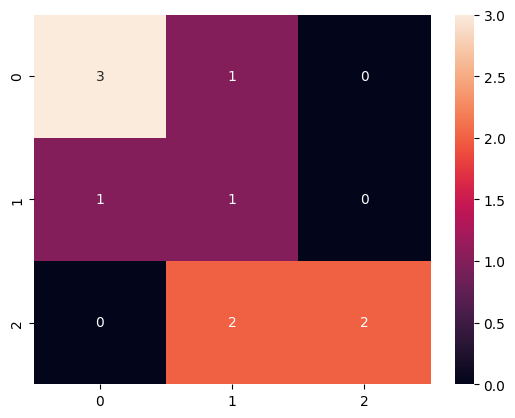

In [599]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [602]:
concatenatedRes_df_random['shop_profile'] = concatenatedRes_df_random['shop_profile'].replace({3: 'High', 2: 'Moderate', 1: 'Low'})

In [603]:
concatenatedRes_df_random.to_csv('day3.csv',index=False)